# Preprocessign an Image
The main objective of the Preprocessing phase is to make as easy as possible for the OCR system to distinguish a character/word from the background.
There are several techniques used for Preprocessing but this **Preprocessor** class can do it without you going into details and jargon of traditional methods.

In [1]:
!pip install -U ocred --no-cache --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 15.7 MB 61.6 MB/s 
     |████████████████████████████████| 40 kB 38.9 MB/s 
     |████████████████████████████████| 70.8 MB 1.5 MB/s 
     |████████████████████████████████| 49.9 MB 1.4 MB/s 
     |████████████████████████████████| 13.5 MB 38.0 MB/s 
     |████████████████████████████████| 19.1 MB 1.1 MB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
     |████████████████████████████████| 3.1 MB 37.7 MB/s 
     |████████████████████████████████| 776.3 MB 1.2 MB/s 
     |████████████████████████████████| 596 kB 64.4 MB/s 
     |████████████████████████████████| 98 kB 42.8 MB/s 
     |████████████████████████████████| 6.4 MB 39.7 MB/s 
     |████████████████████████████████| 3.4 MB 50.3 MB/s 
     |████████████████████████████████| 1.9 MB 41.6 MB/s 
     |████████████████████████

In [1]:
# manually preprocessing an image
import cv2
from scipy import ndimage
from ocred import Preprocessor
from google.colab.patches import cv2_imshow


preprocessed = Preprocessor("/content/images/CosmosOne.jpg")

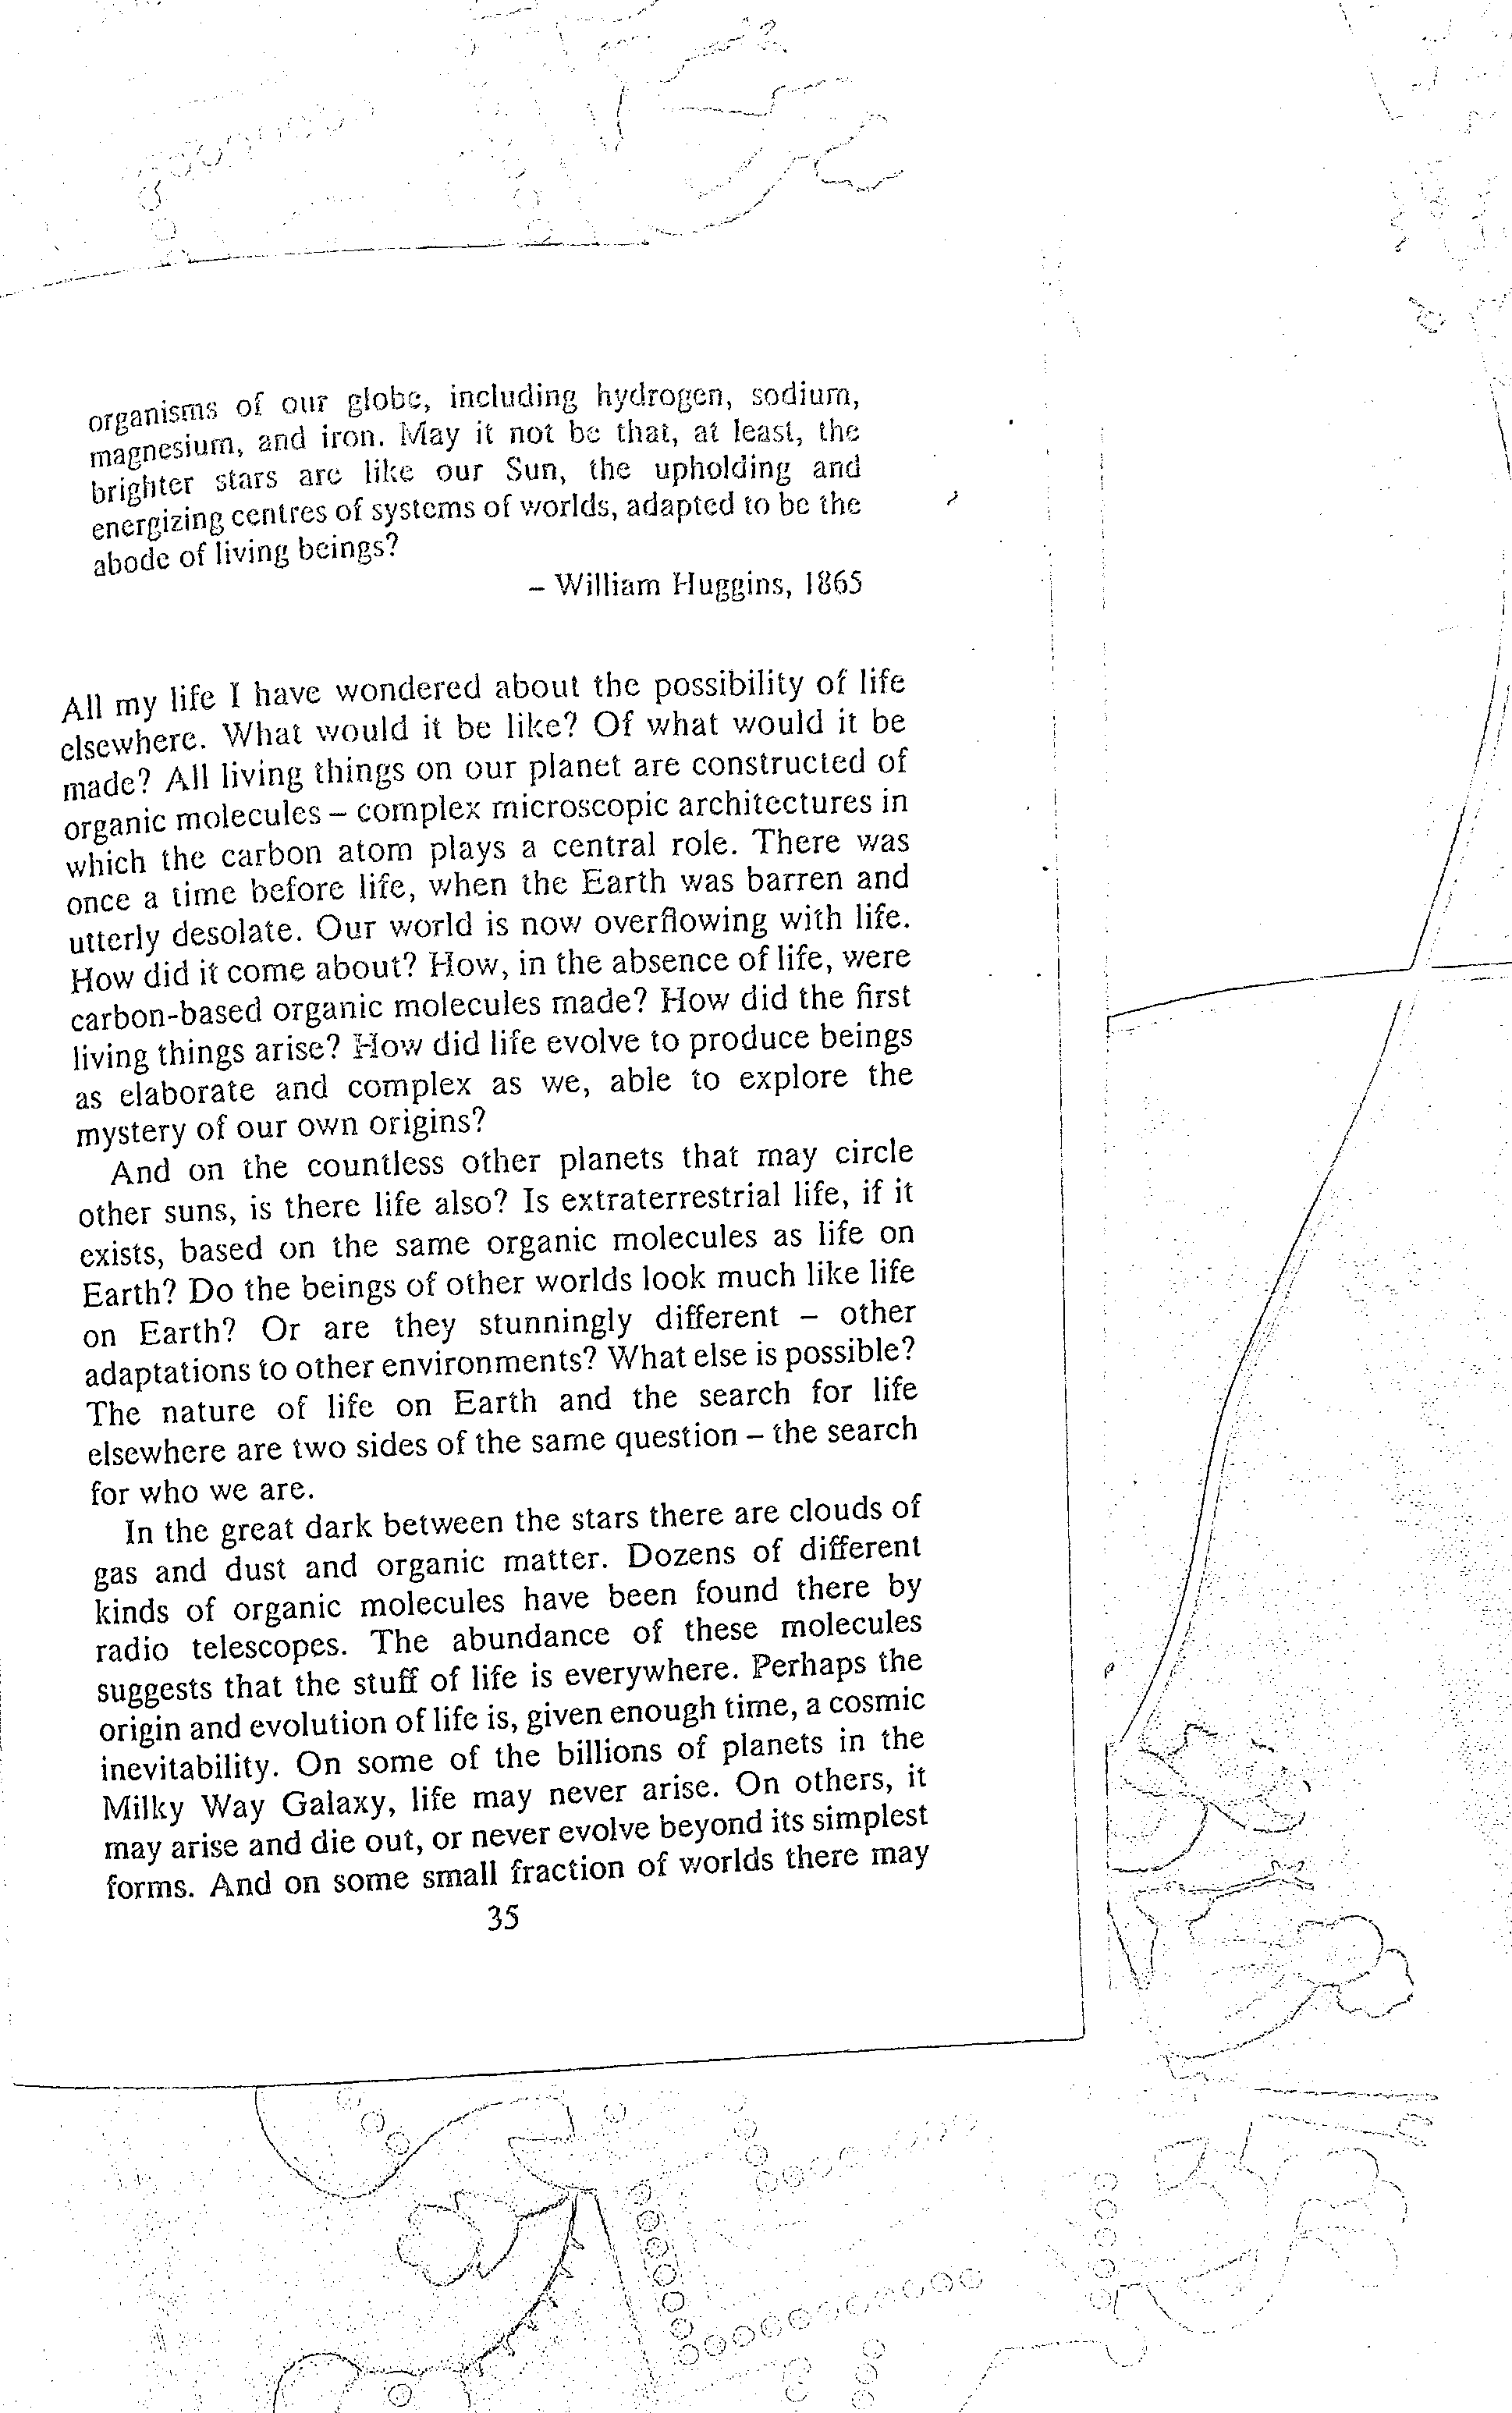

In [2]:
# scan the image and copy the scanned image
scanned = preprocessed.scan(inplace=True)
orig = scanned.copy()

cv2_imshow(orig)

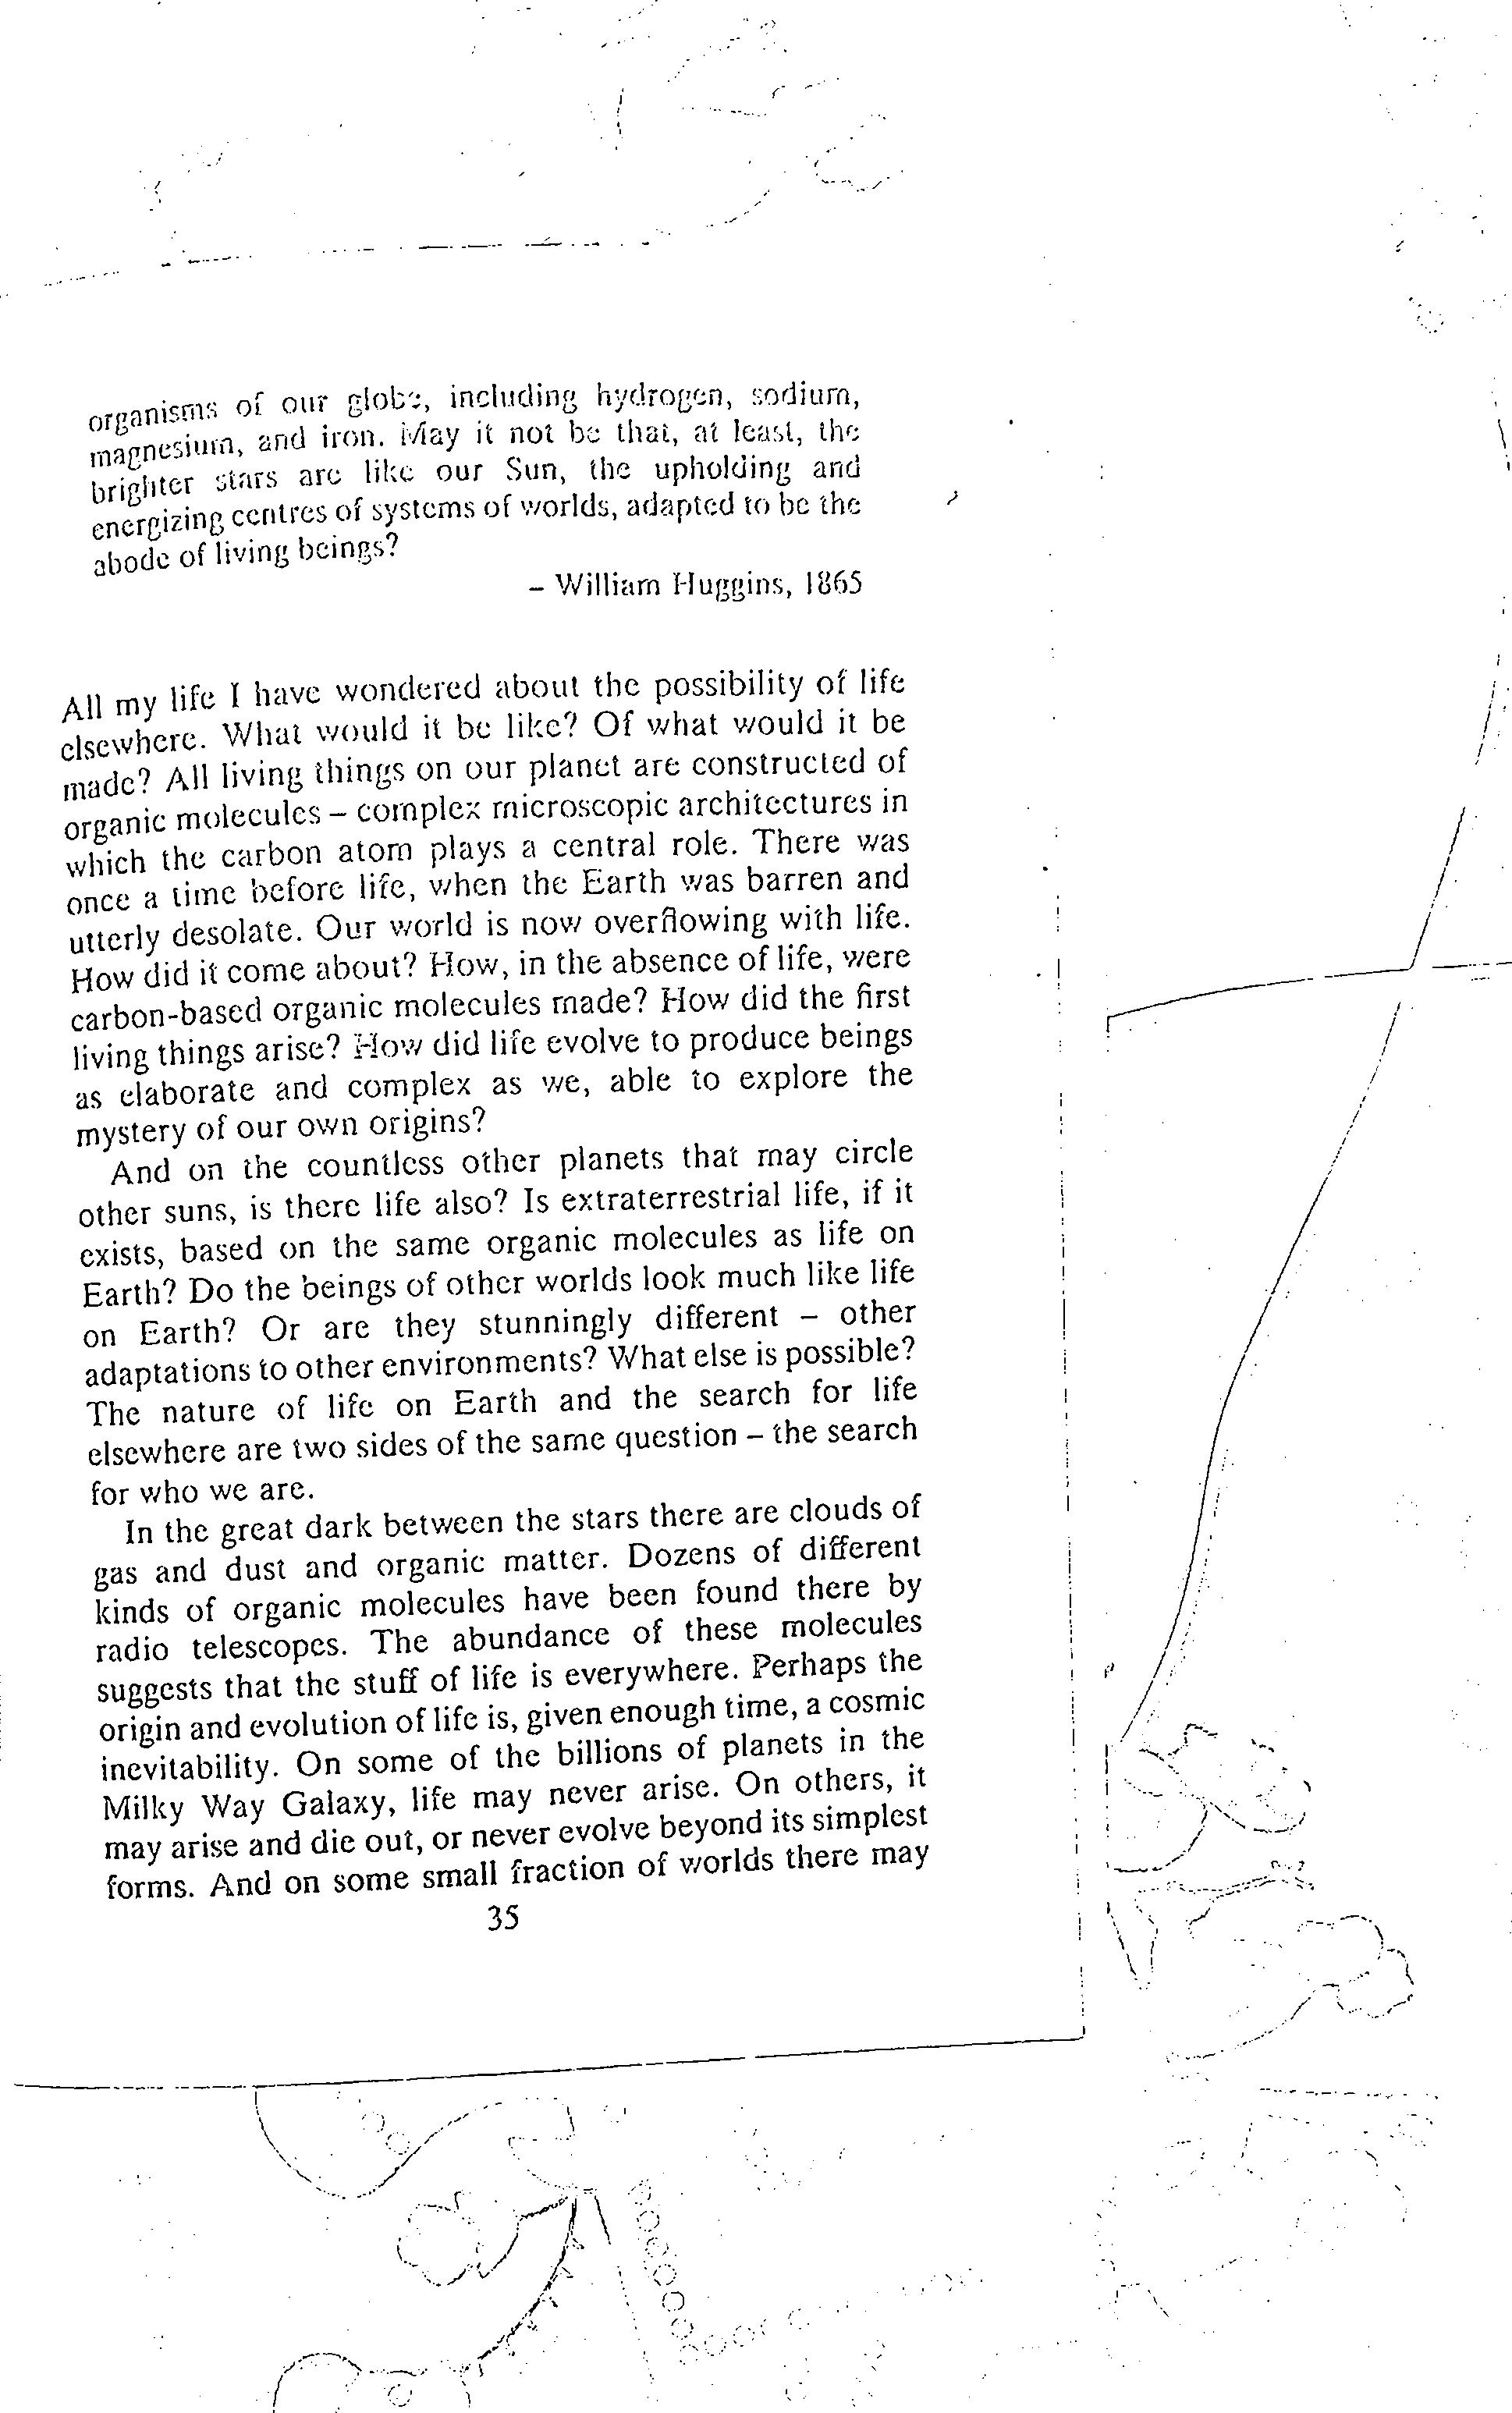

In [3]:
# remove noise
noise_free = preprocessed.remove_noise(
    inplace=True, overriden_image=scanned
)

cv2_imshow(noise_free)

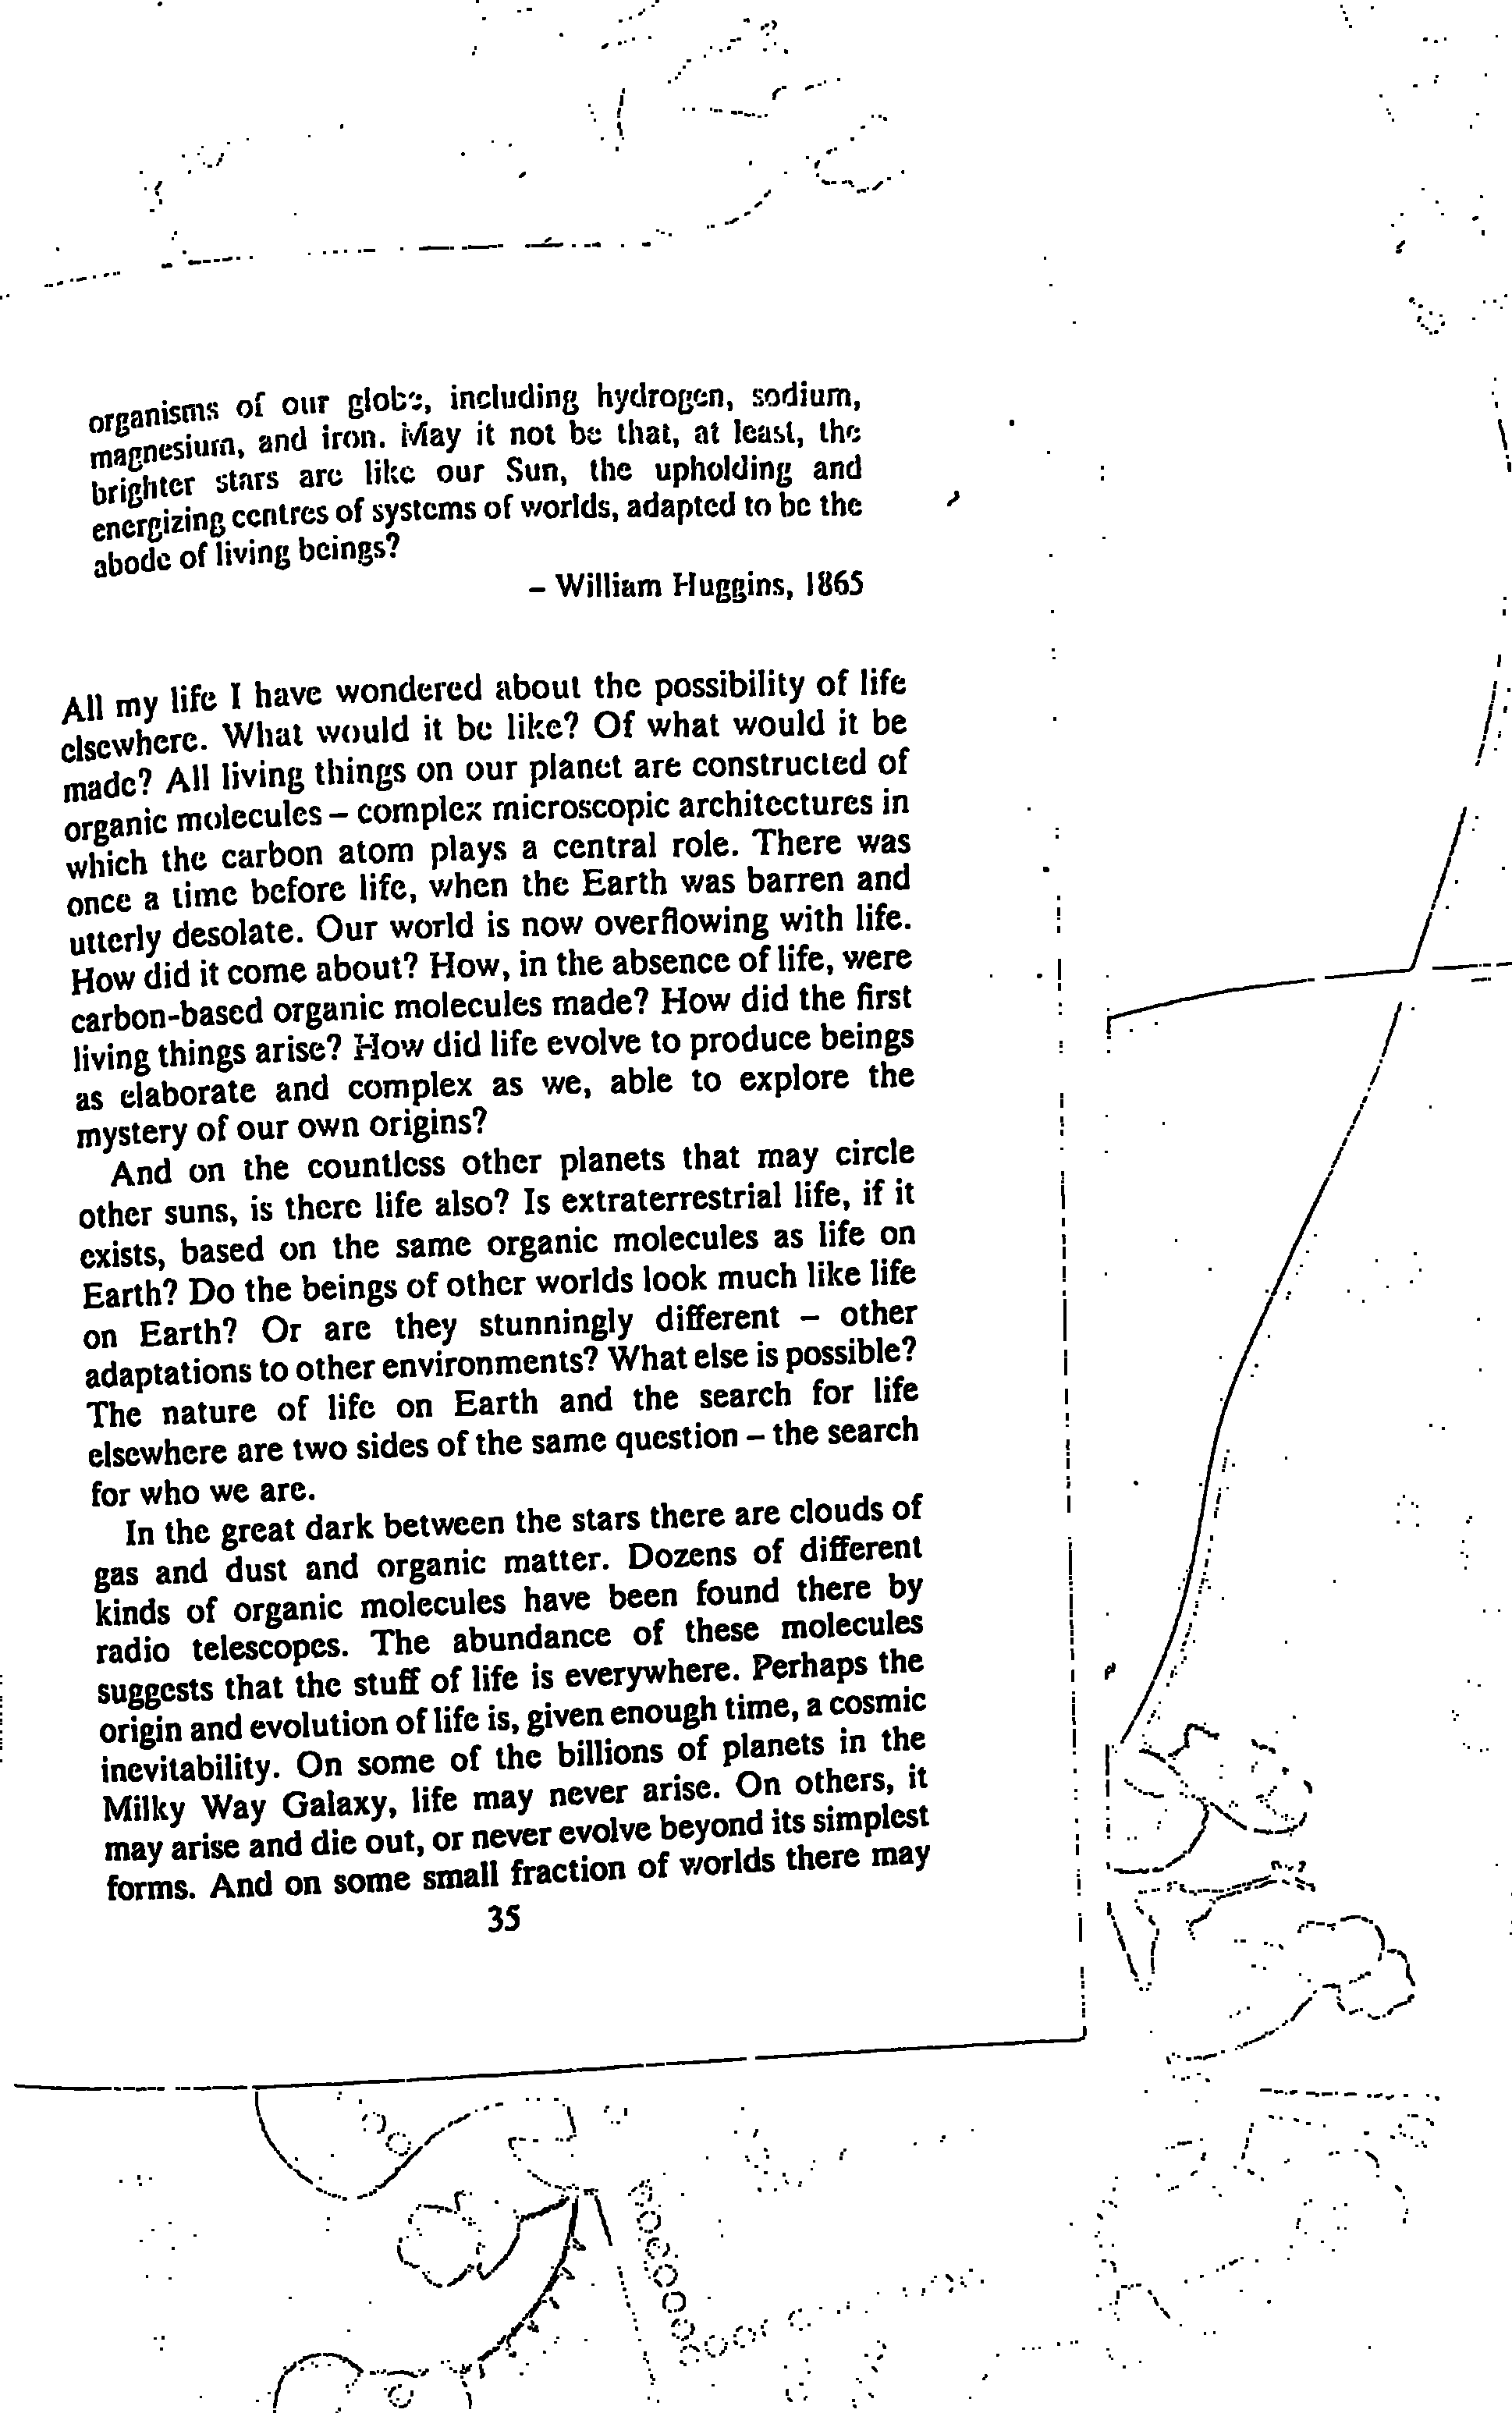

In [4]:
# thicken the ink to draw Hough lines better
thickened = preprocessed.thicken_font(
    inplace=True, overriden_image=noise_free
)

cv2_imshow(thickened)

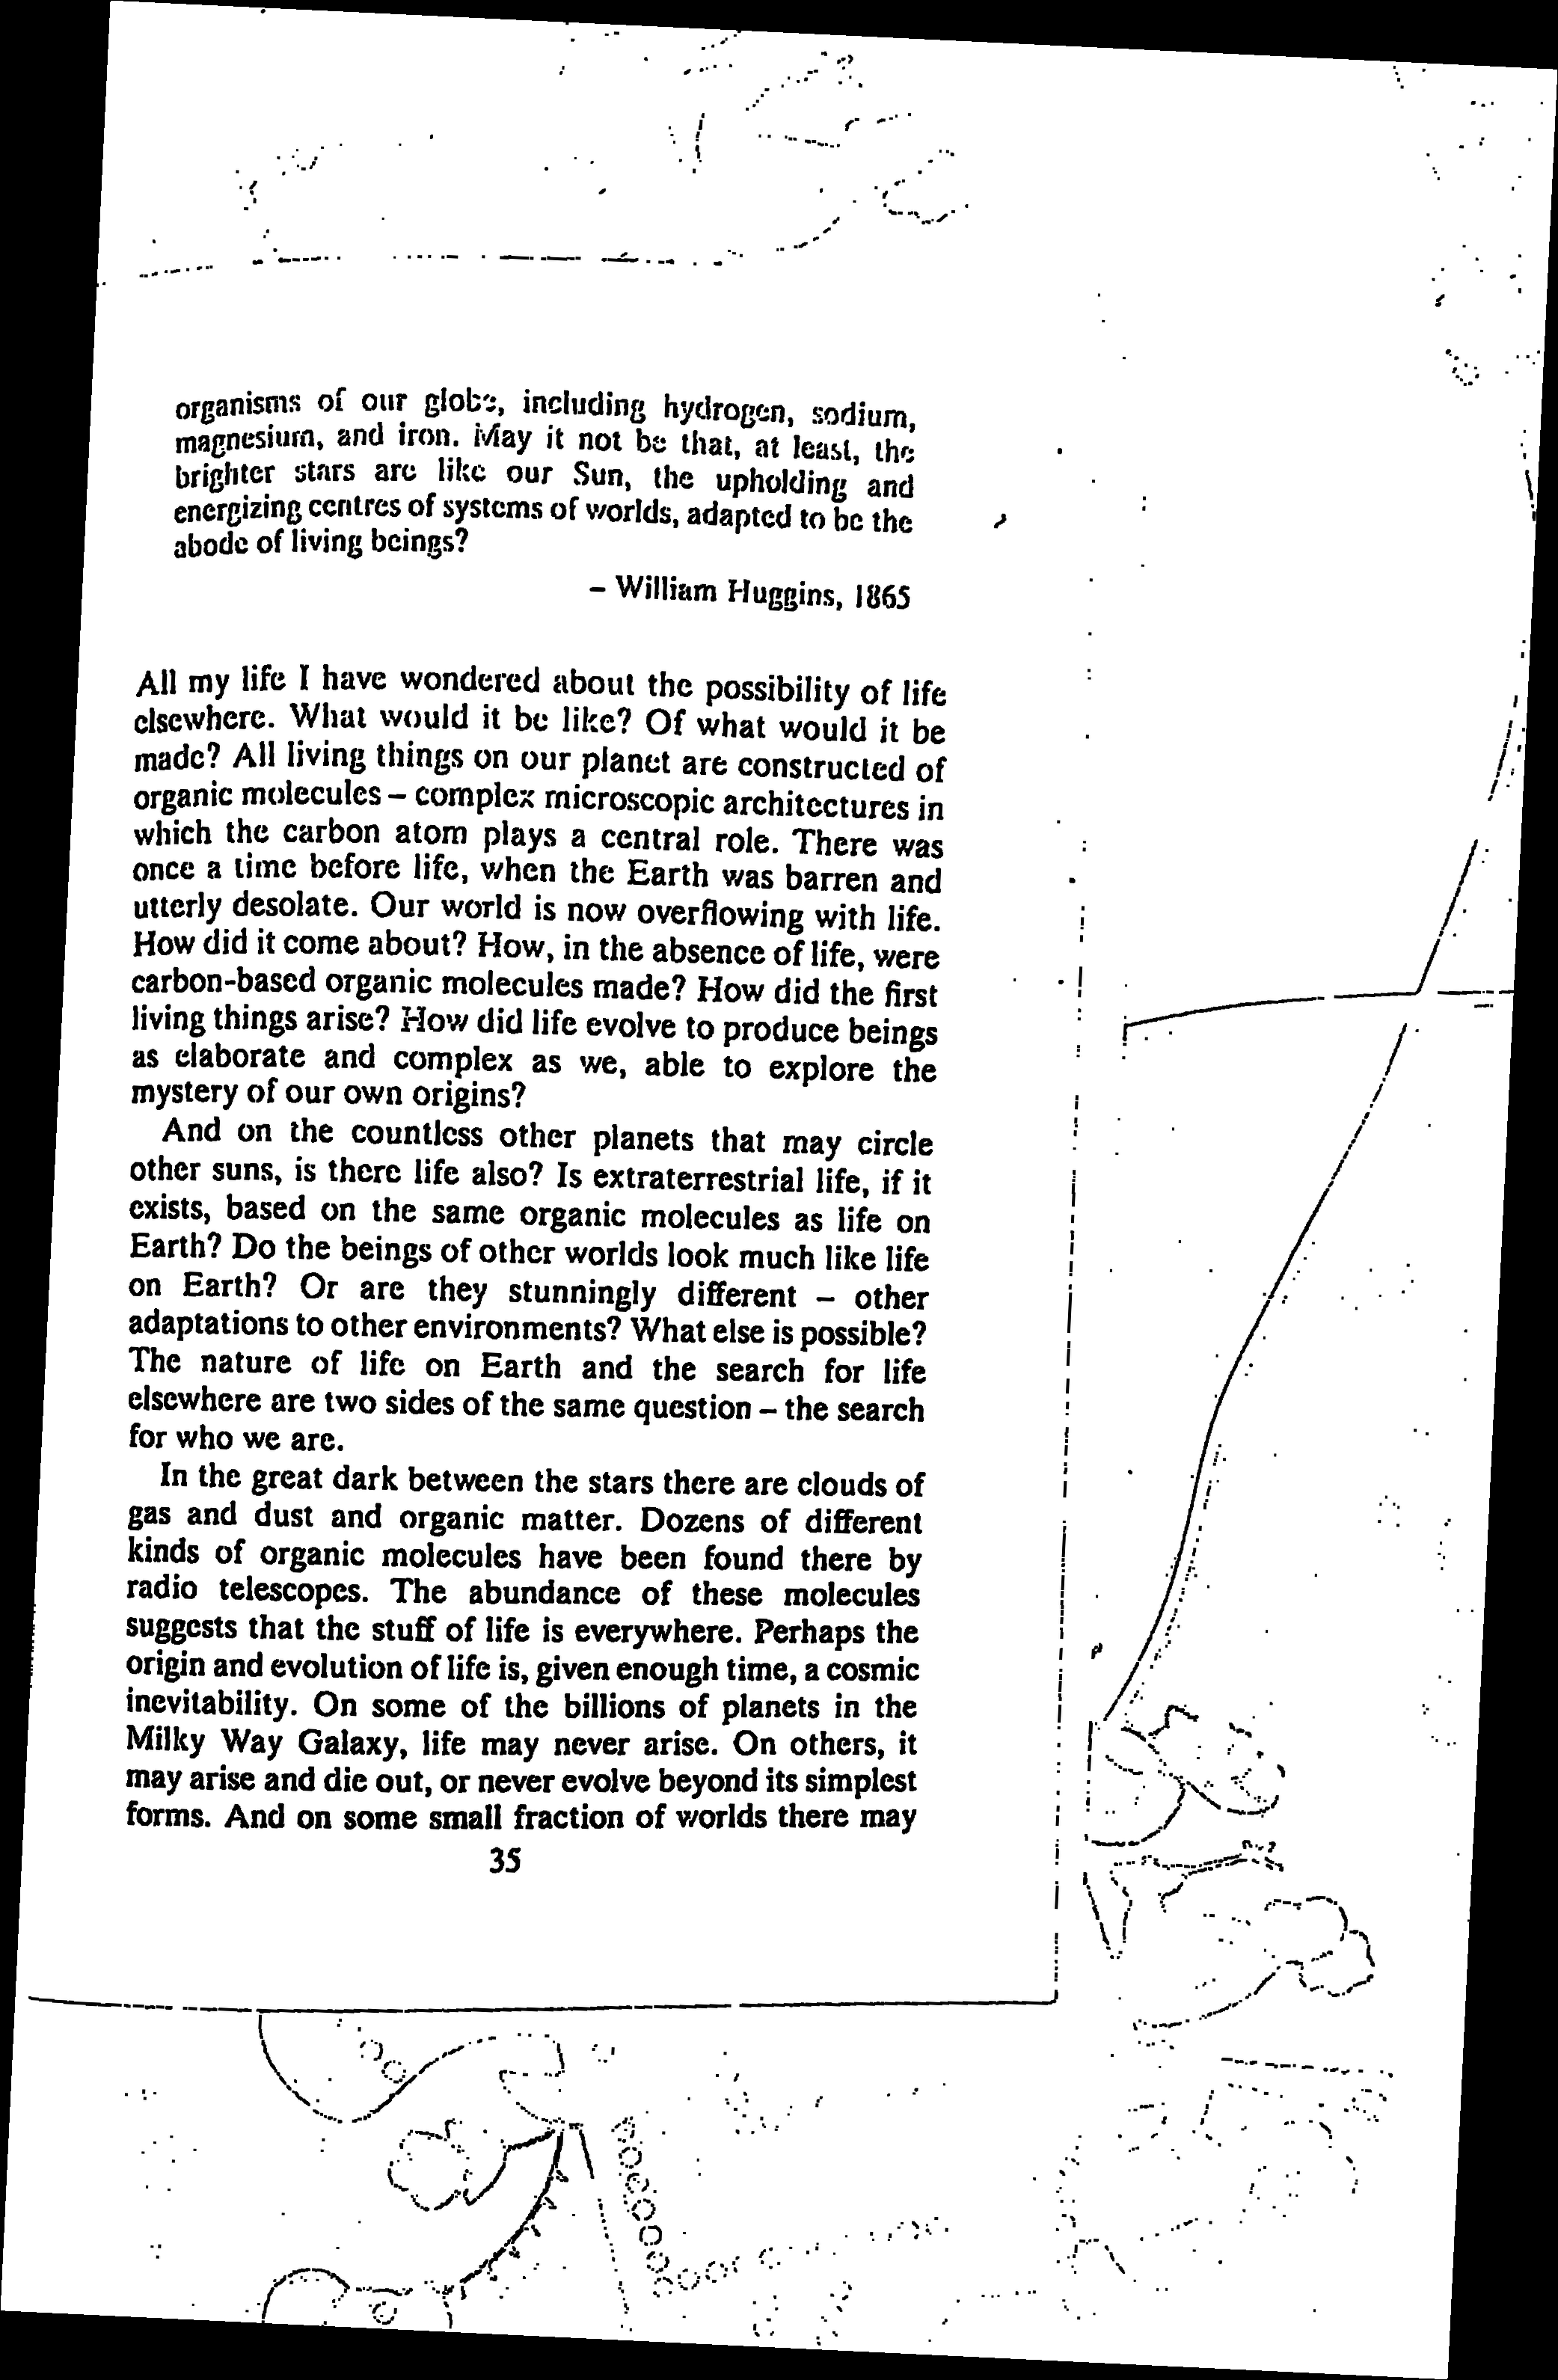

In [5]:
# calculate the median angle of all the Hough lines
_, median_angle = preprocessed.rotate(
    inplace=True, overriden_image=thickened
)

cv2_imshow(_)

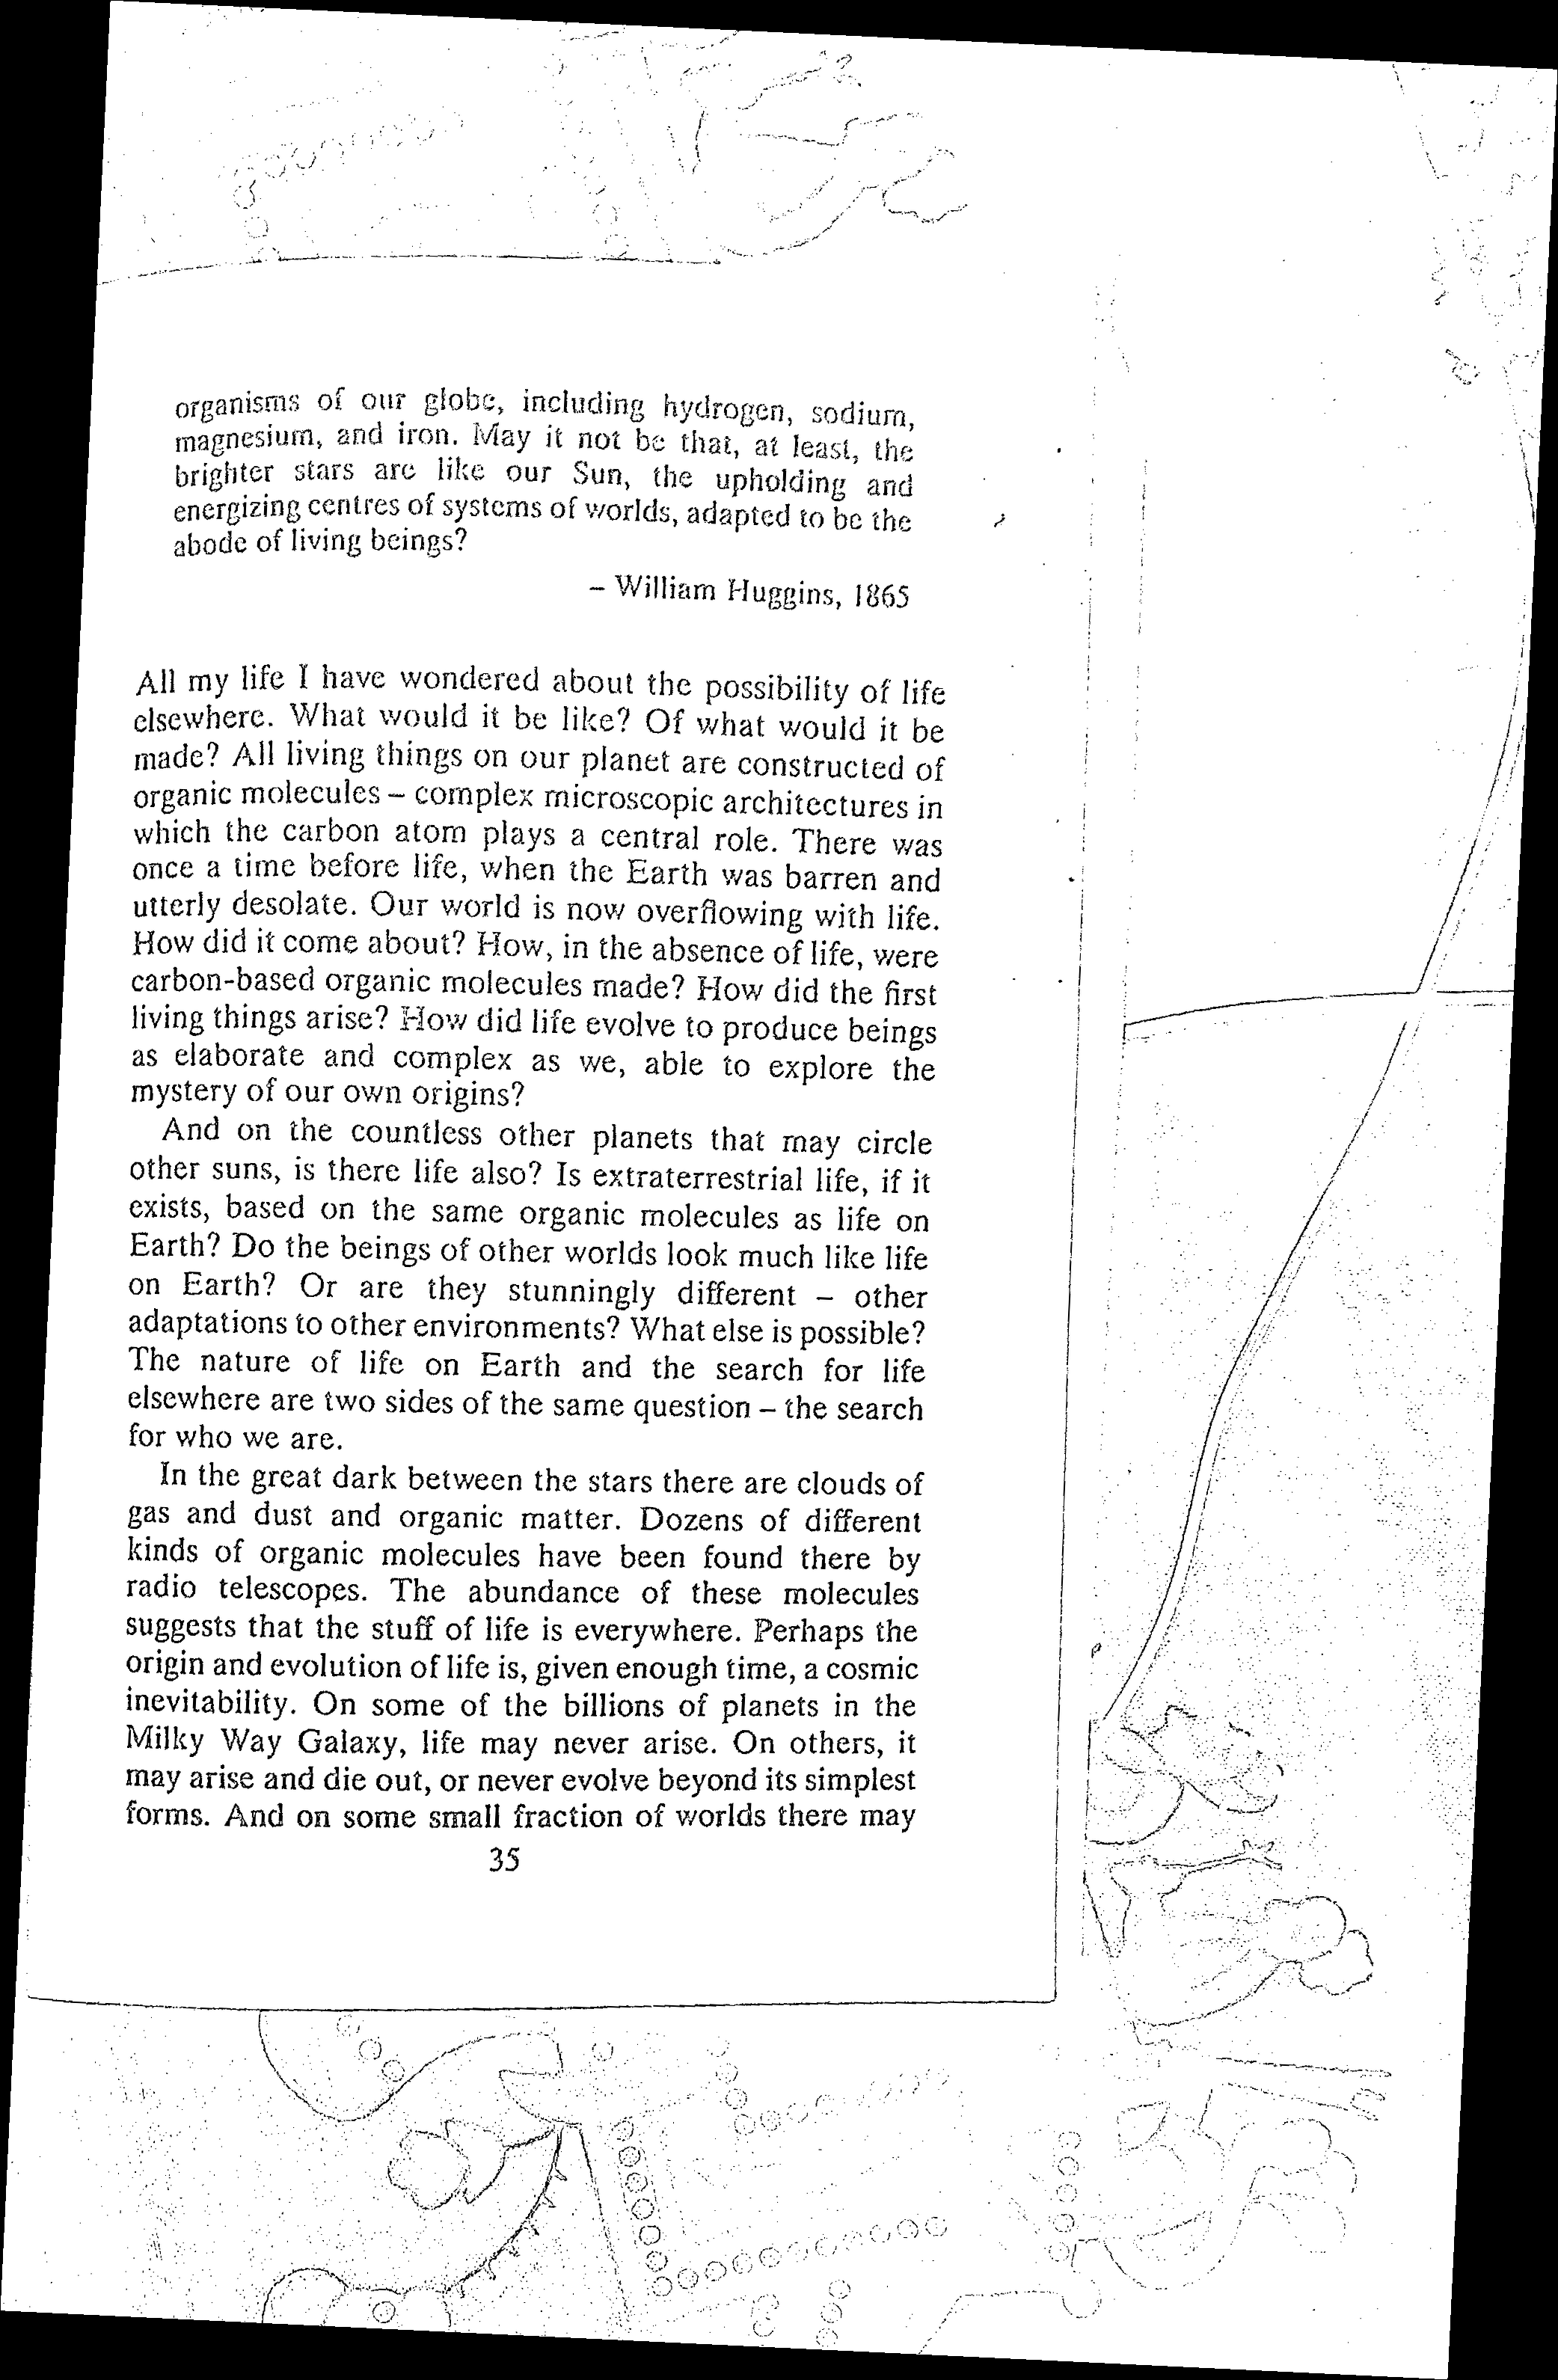

In [6]:
# rotate the original scanned image
rotated = ndimage.rotate(orig, median_angle)

cv2_imshow(rotated)

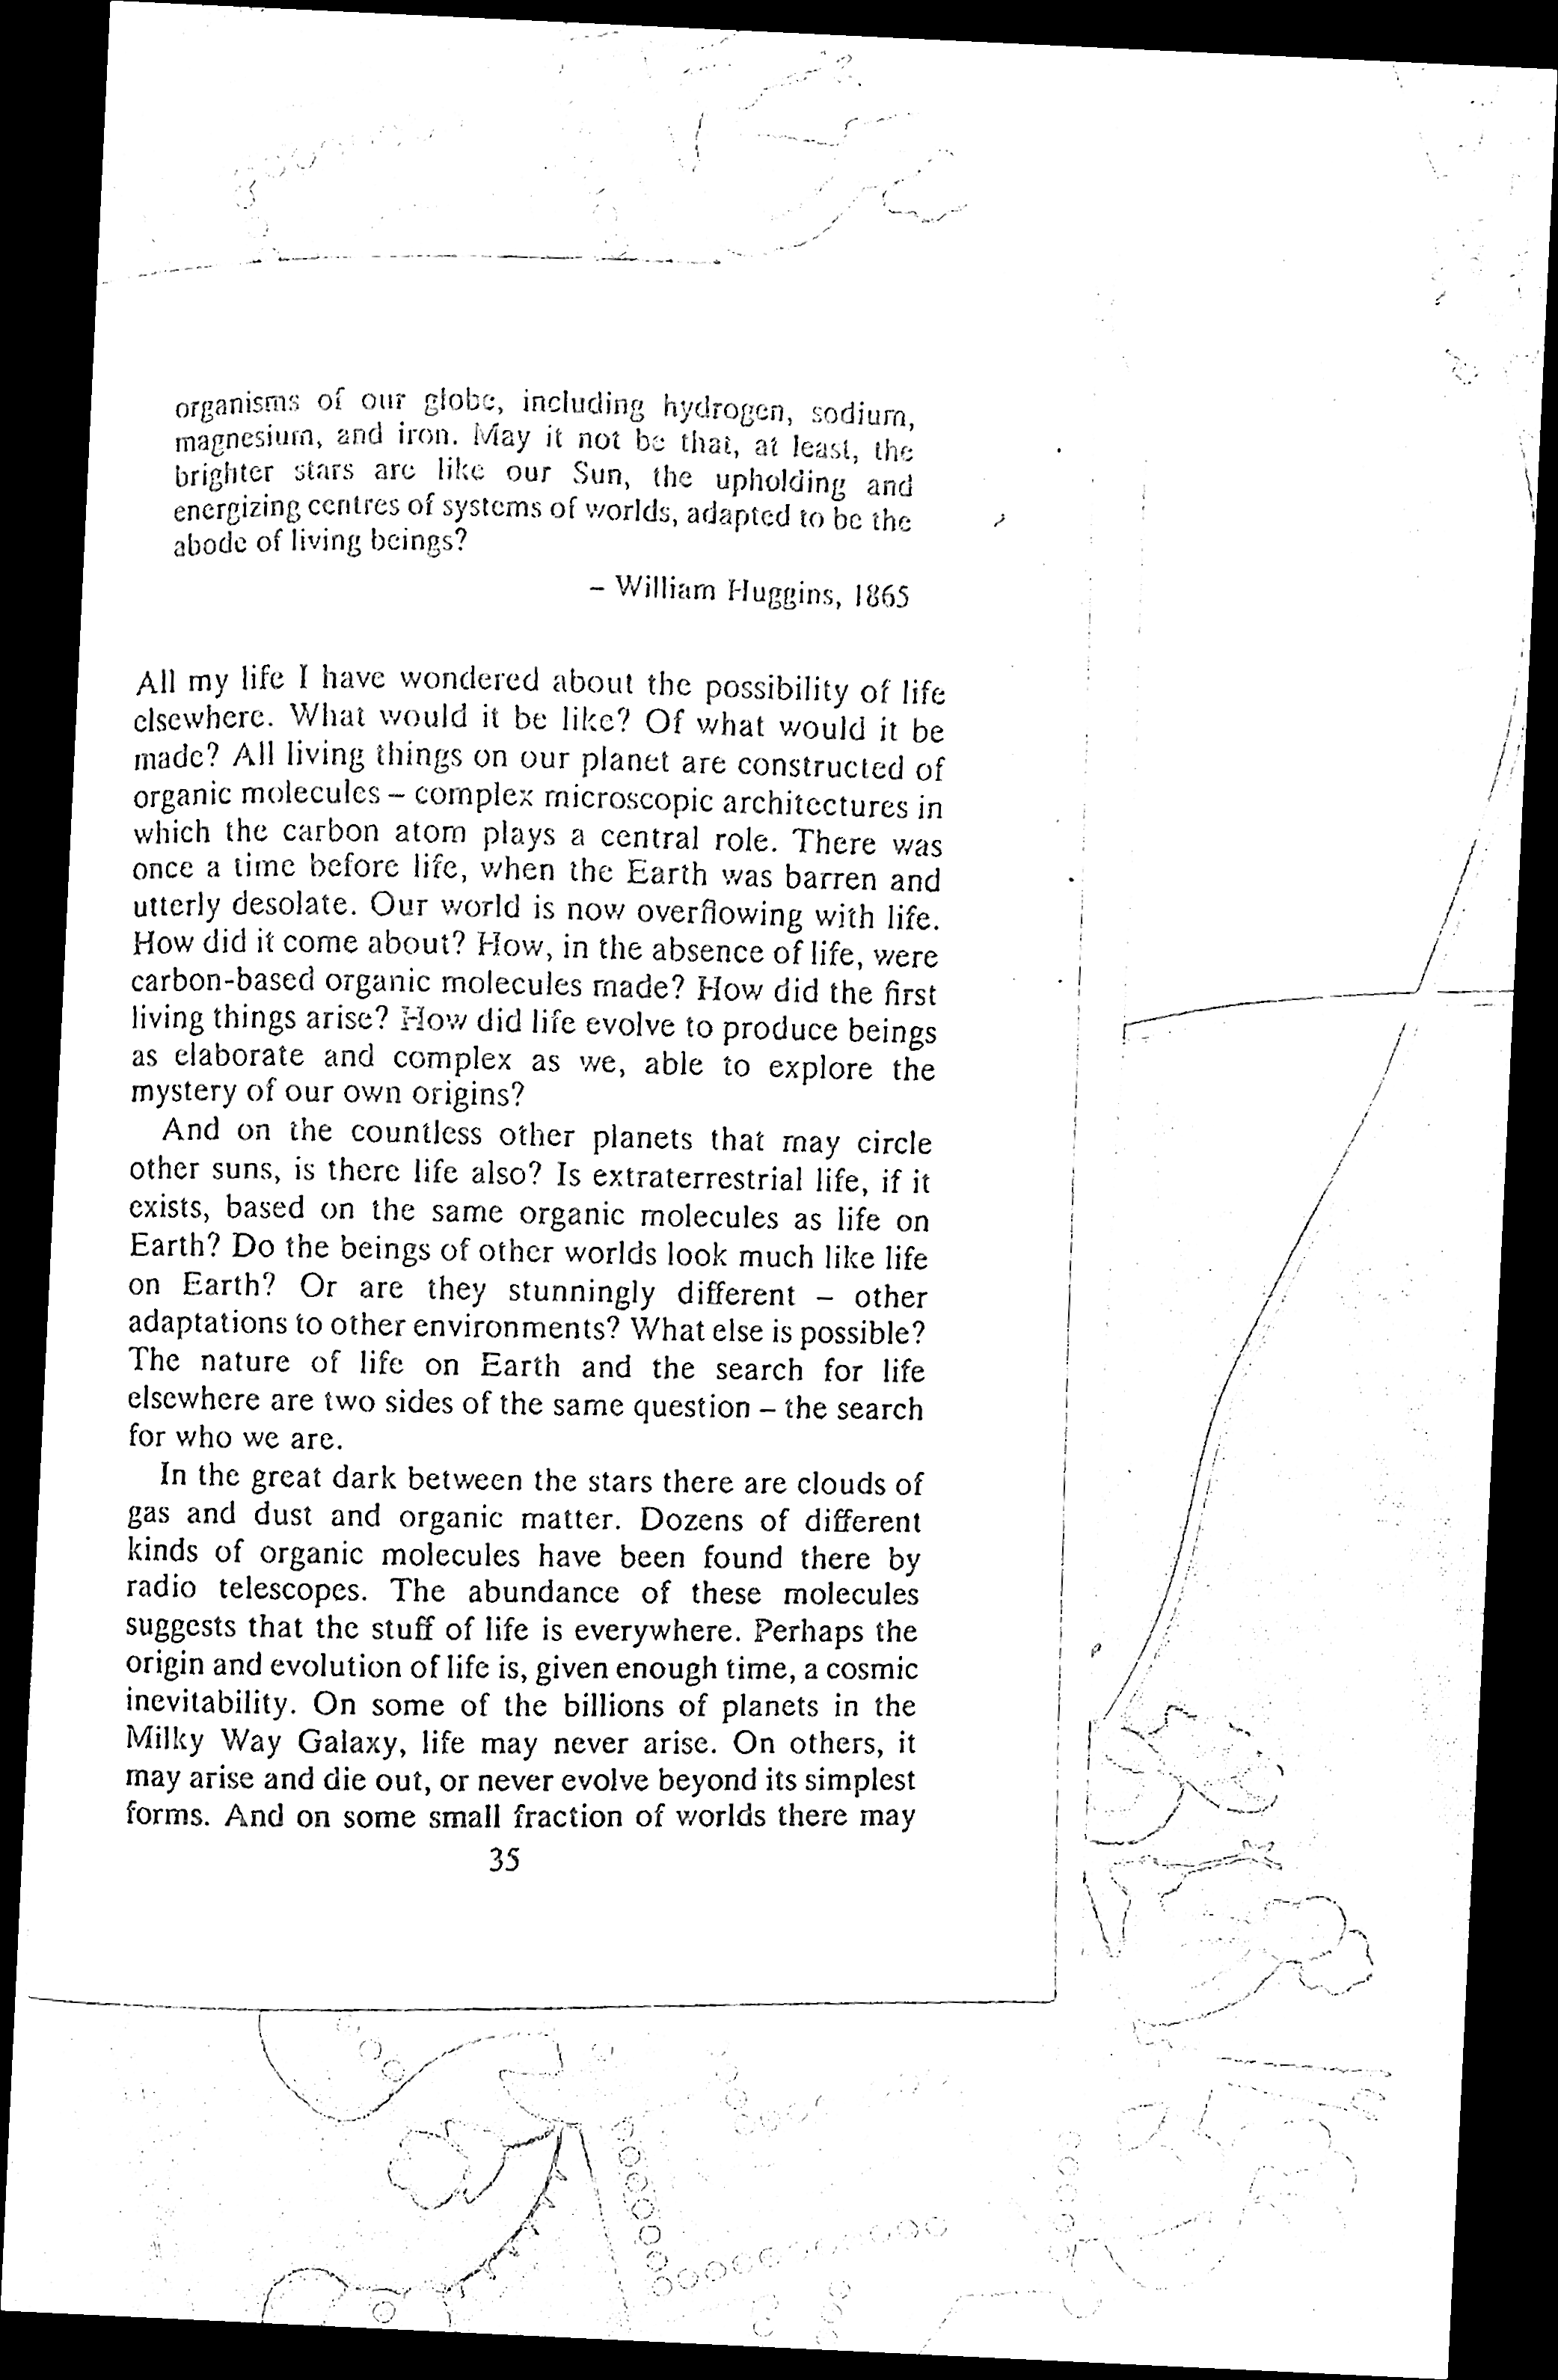

In [7]:
# remove noise again
final_img = preprocessed.remove_noise(inplace=True, overriden_image=rotated)

cv2_imshow(final_img)